# Análise Exploratória de Dados
## Importando bibliotecas

In [30]:
from src.data import prepare
from src.data import process
from src.data import visualize

import pandas as pd
import numpy as np
import re
import string
from matplotlib import pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams

from wordcloud import WordCloud
from PIL import Image

plt.style.use('seaborn-notebook')
%matplotlib inline

## Carregando os dados

In [31]:
true_path = "../data/raw/full_texts/true/"
fake_path = "../data/raw/full_texts/fake/"
output_path = "../data/interim/news.csv"

prepare.make_text_dataframe(true_path, fake_path, output_path)

## Importando dados pré-processados

In [32]:
news_df = pd.read_csv(output_path)
news_df.head(10)

,text,label
0,"Marielle tinha potencial para ser deputada, se...",true
1,Questionado no 12.o Congresso da Associação B...,true
2,Noivos gravaram vídeo agradecendo produtora an...,true
3,"Sem acordo, Câmara faz nesta terça nova tentat...",true
4,MP diz que há fortes indícios de que mãe mando...,true
5,"Educação financeira começa na infância, dizem ...",true
6,"Em visita ao Japão, Trump diz que tempo da pac...",true
7,Atentado em Nova York foi o oitavo com atropel...,true
8,Ativistas lamentam partida de navio com mais d...,true
9,Há uma nova revolução tecnológica em marcha?\n...,true


In [33]:
news_df[news_df['text'].apply(lambda c: str(c).find('discurso')) != -1]

,text,label
11,'Palocci foi contar uma mentira maior que a do...,true
13,Taróloga apresenta as previsões para o ano de ...,true
14,"Luta pela vida, reforço da desigualdade ou gas...",true
28,Temer diz que EUA vão suspender sobretaxa do a...,true
29,"Em vez de remédio contra Aids, fábrica financi...",true
...,...,...
7126,Tiririca : As escolas falam mais de sexo que ...,fake
7146,"Com a mesma ""lengalenga"" de sempre, Lula dis...",fake
7147,Trump manda último recado para Kim Jong-un e c...,fake
7188,"""Rússia planeja atacar o Reino Unido e matar m...",fake


## Pré-Processamento Básico

### Removendo pontuação

In [34]:
punctuation = list(string.punctuation) # Obtendo os caracteres especiais como lista
del(punctuation[12]) # Excluindo da remoção o caractere especial "-"
punctuation = "".join(punctuation) # Transformando novamente em string
punctuation

'!"#$%&\'()*+,./:;<=>?@[\\]^_`{|}~'

In [35]:
news_df['text'] = news_df['text'].apply(lambda c: re.sub('[%s]' % re.escape(punctuation), '', c))
news_df.head(10)

,text,label
0,Marielle tinha potencial para ser deputada sen...,true
1,Questionado no 12o Congresso da Associação Br...,true
2,Noivos gravaram vídeo agradecendo produtora an...,true
3,Sem acordo Câmara faz nesta terça nova tentati...,true
4,MP diz que há fortes indícios de que mãe mando...,true
5,Educação financeira começa na infância dizem e...,true
6,Em visita ao Japão Trump diz que tempo da paci...,true
7,Atentado em Nova York foi o oitavo com atropel...,true
8,Ativistas lamentam partida de navio com mais d...,true
9,Há uma nova revolução tecnológica em marcha\n\...,true


In [36]:
news_df[news_df['text'].apply(lambda c: str(c).find('discurso')) != -1]

,text,label
11,Palocci foi contar uma mentira maior que a dos...,true
13,Taróloga apresenta as previsões para o ano de ...,true
14,Luta pela vida reforço da desigualdade ou gast...,true
28,Temer diz que EUA vão suspender sobretaxa do a...,true
29,Em vez de remédio contra Aids fábrica financia...,true
...,...,...
7126,Tiririca As escolas falam mais de sexo que d...,fake
7146,Com a mesma lengalenga de sempre Lula discur...,fake
7147,Trump manda último recado para Kim Jong-un e c...,fake
7188,Rússia planeja atacar o Reino Unido e matar mi...,fake


### Passando as palavras para minúsculo

In [37]:
news_df['text'] = news_df['text'].apply(lambda x: x.lower())
news_df.head(10)

,text,label
0,marielle tinha potencial para ser deputada sen...,true
1,questionado no 12o congresso da associação br...,true
2,noivos gravaram vídeo agradecendo produtora an...,true
3,sem acordo câmara faz nesta terça nova tentati...,true
4,mp diz que há fortes indícios de que mãe mando...,true
5,educação financeira começa na infância dizem e...,true
6,em visita ao japão trump diz que tempo da paci...,true
7,atentado em nova york foi o oitavo com atropel...,true
8,ativistas lamentam partida de navio com mais d...,true
9,há uma nova revolução tecnológica em marcha\n\...,true


In [38]:
news_df[news_df['text'].apply(lambda c: str(c).find('discurso')) != -1]

,text,label
11,palocci foi contar uma mentira maior que a dos...,true
13,taróloga apresenta as previsões para o ano de ...,true
14,luta pela vida reforço da desigualdade ou gast...,true
28,temer diz que eua vão suspender sobretaxa do a...,true
29,em vez de remédio contra aids fábrica financia...,true
...,...,...
7146,com a mesma lengalenga de sempre lula discur...,fake
7147,trump manda último recado para kim jong-un e c...,fake
7188,rússia planeja atacar o reino unido e matar mi...,fake
7189,em 2006 presidente da câmara pediu ajuda do ex...,fake


## Analisando os dados obtidos

### Quantidade de dados

In [10]:
news_df['label'].value_counts()

true    3600
fake    3600
Name: label, dtype: int64

*O conjunto de dados do corpus se encontra balanceado. 
Pois há um número igual de amostras (textos) em ambas as classes: verdadeiros (true) e falsos (fake).*

### Comprimento

#### De todo o texto

- Qual o comprimento dos textos obtidos?
- O comprimento dos textos difere entre falsos e verdadeiros?

In [11]:
news_df['text_length'] = news_df['text'].str.len()

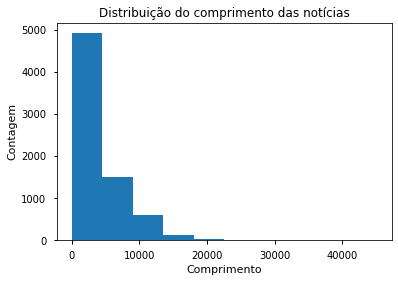

In [12]:
plt.hist(news_df.text_length)
plt.xlabel('Comprimento')
plt.ylabel('Contagem')
plt.title('Distribuição do comprimento das notícias')
plt.show()

In [13]:
news_df.text_length.describe()

count     7200.000000
mean      3797.509444
std       3963.118688
min         44.000000
25%        919.000000
50%       2128.000000
75%       5465.000000
max      45033.000000
Name: text_length, dtype: float64

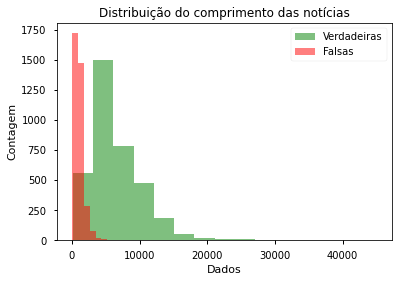

In [14]:
bins = 15
alpha = 0.5

plt.hist(news_df[news_df.label == 'true'].text_length,
         bins=bins,
         alpha=alpha,
         label='Verdadeiras',
         color='green')

plt.hist(news_df[news_df.label == 'fake'].text_length,
         bins=bins,
         alpha=alpha,
         label='Falsas',
         color='red')

plt.xlabel('Dados')
plt.ylabel('Contagem')
plt.title('Distribuição do comprimento das notícias')
plt.legend(loc='upper right')

plt.show()

*As notícias têm entre 46 e cerca de 46000 palavras, se distribuindo de maneira desigual de acordo com sua categoria. O comprimento das notícias verdadeiras tem tamanhos mais variados e mediana superior às notícias falsas, cujo comprimento se concentra numa faixa reduzida.* 

*Dentro desse conjunto de dados, notícias falsas tendem a ser mais curtas.*

#### Das palavras

- Há diferença no tamanho médio das palavras entre as diferentes categorias de notícias?

In [15]:
news_df['mean_word_len'] = (
    news_df['text']
    .str
    .split()
    .apply(lambda text : [len(word) for word in text])
    .map(lambda word: np.mean(word))
)

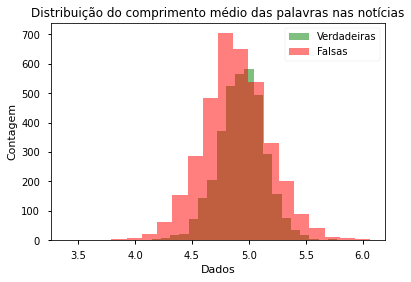

In [16]:
bins = 20
alpha = 0.5

plt.hist(news_df[news_df.label == 'true'].mean_word_len,
         bins=bins,
         alpha=alpha,
         label='Verdadeiras',
         color='green')

plt.hist(news_df[news_df.label == 'fake'].mean_word_len,
         bins=bins,
         alpha=alpha,
         label='Falsas',
         color='red')

plt.xlabel('Dados')
plt.ylabel('Contagem')
plt.title('Distribuição do comprimento médio das palavras nas notícias')
plt.legend(loc='upper right')

plt.show()

*Não parece haver diferença no comprimento médio das palavras utilizadas nas notícias, quaisquer que sejam as categorias.*

### Nuvens de palavras
- As palavras mais usadas nas notícias abordadas estão dentro dos mesmos campos semânticos?

In [17]:
nltk.download('stopwords')
stop = set(stopwords.words('portuguese'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/douglas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


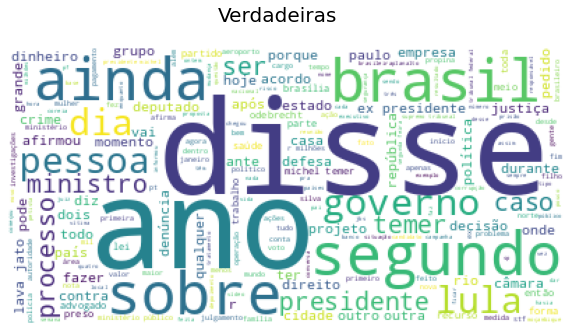

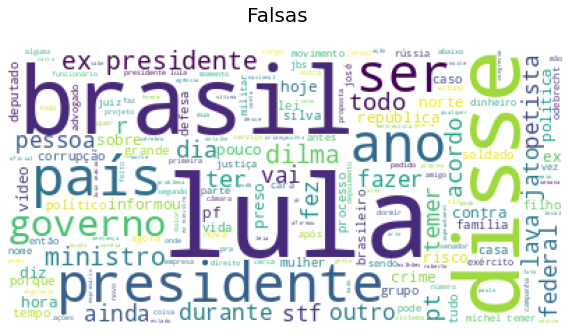

In [18]:
visualize.show_wordcloud(news_df[news_df.label == 'true'].text[0:100], 
               stop, title = 'Verdadeiras')

visualize.show_wordcloud(news_df[news_df.label == 'fake'].text[0:100], 
               stop, title = 'Falsas')

plt.show()

### N-gramas
- Em que contextos as palavras são usadas?

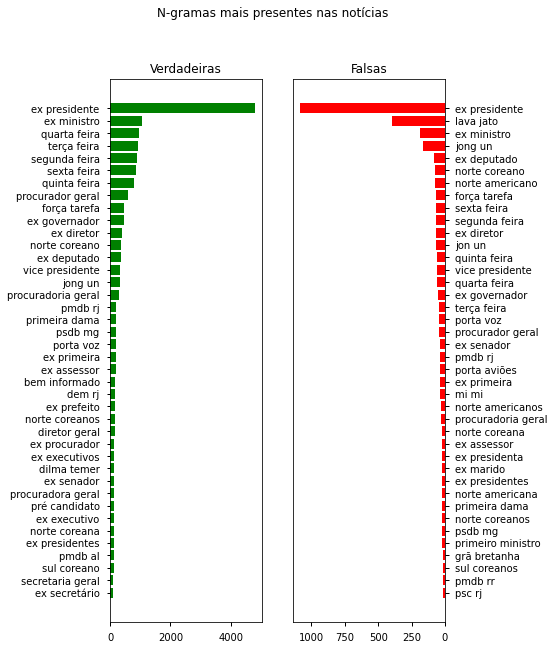

In [19]:
true_corpus = process.create_corpus(news_df[news_df.label == 'true'].text)
fake_corpus = process.create_corpus(news_df[news_df.label == 'fake'].text)

true_n_gram = process.get_top_ngram(corpus = true_corpus, n=2, top=40, stop_words=stop)
fake_n_gram = process.get_top_ngram(corpus = fake_corpus, n=2, top=40, stop_words=stop)

visualize.show_ngrams(true_n_gram, fake_n_gram)

Podemos observar que em ambas as categorias, se faz referência a "ex presidente" e a ocupantes anteriores de cargos ("ex ministro", "ex deputado", "ex diretor"). 

Nas notícias verdadeiras há uma *contaminação* de palavras relacionadas aos dias da semana. Há ainda referências a partidos (psdb, dem, pmdb), e a Coreia do norte em ambos os casos.

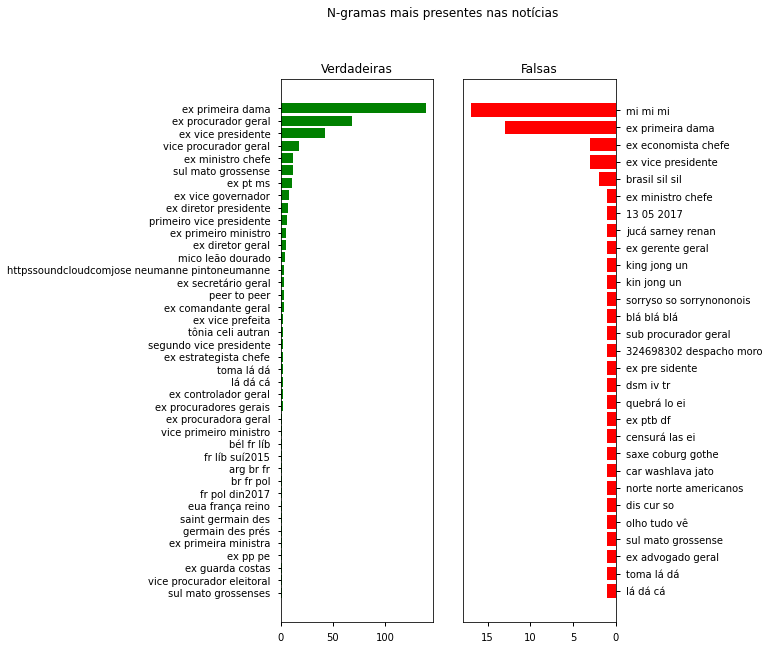

In [20]:
true_n_gram = process.get_top_ngram(corpus = true_corpus, n=3, top=40, stop_words=stop)
fake_n_gram = process.get_top_ngram(corpus = fake_corpus, n=3, top=40, stop_words=stop)

visualize.show_ngrams(true_n_gram, fake_n_gram)

Com a visualização em trigramas fica mais fácil observar a contaminação nos textos. Observamos 

- datas, ex: "28 07 2016", "16 02 2017"
- endereços eletrônicos 
    - aparentemente relacionados, ex: "www institutolula org"
    - aparentemente não relacionados, ex: "www letras mus"

Uma eliminação de números e endereços eletrônicos (palavras com www, https, etc) poderá melhorar a qualidade dos dados.